In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [66]:
df = pd.read_csv("crunchbase git/crunchbase.csv")
df

,Company,URL,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Country,Industry
0,ByteDance,https://www.crunchbase.com/organization/bytedance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,China,"Content, Data Mining, Internet, Social Media"
1,SpaceX,https://www.crunchbase.com/organization/space-...,1.0,NaN,NaN,9.911791e+09,11.0,81.0,United States,"Advanced Materials, Aerospace, Manufacturing, ..."
2,SHEIN,https://www.crunchbase.com/organization/shein-...,1.0,NaN,NaN,2.053427e+09,4.0,6.0,China,"E-Commerce, Fashion, Marketplace, Textiles"
3,Stripe,https://www.crunchbase.com/organization/stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,United States,"Finance, FinTech, Mobile Payments, SaaS"
4,Canva,https://www.crunchbase.com/organization/canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,Australia,"Graphic Design, Photo Editing, Publishing, Sof..."
...,...,...,...,...,...,...,...,...,...,...
1196,Zhaogang,https://www.crunchbase.com/organization/zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,China,"Advanced Materials, Industrial Manufacturing, ..."
1197,Zhuan Zhuan,https://www.crunchbase.com/organization/zhuan-...,2.0,NaN,1.0,9.900000e+08,3.0,7.0,China,"Consumer, Consumer Goods, E-Commerce, Marketplace"
1198,Zihaiguo,https://www.crunchbase.com/organization/zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,China,"Food and Beverage, Food Processing"
1199,Zopa,https://www.crunchbase.com/organization/zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,United Kingdom,"Credit Cards, Financial Services, FinTech, Len..."


In [67]:
df1 = pd.read_csv("unicorn_aug.csv")
df1 = df1.drop(["Unnamed: 0"], axis=1)
df1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,$140.00,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,$127.00,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,$100.00,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,$95.00,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,$40.00,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,$1.00,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,$1.00,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,$1.00,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,$1.00,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [68]:
df1["Valuation ($B)"] = df1['Valuation ($B)'].str.replace('$', '').astype(float)
df1

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,140.0,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,127.0,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,100.0,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,95.0,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,40.0,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,1.0,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,1.0,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,1.0,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [69]:
# convert to number of seconds after 1970/1/1

df1['Date Joined'] = pd.to_datetime(df1['Date Joined'], format='%m/%d/%y').apply(lambda x: pd.Timestamp(x).timestamp())
df1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [70]:
merged_df = pd.merge(df, df1, on='Company')
merged_df

,Company,URL,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Country_x,Industry_x,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,urlsub,ceo,education
0,ByteDance,https://www.crunchbase.com/organization/bytedance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,China,"Content, Data Mining, Internet, Social Media",140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,https://www.crunchbase.com/organization/space-...,1.0,NaN,NaN,9.911791e+09,11.0,81.0,United States,"Advanced Materials, Aerospace, Manufacturing, ...",127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,https://www.crunchbase.com/organization/shein-...,1.0,NaN,NaN,2.053427e+09,4.0,6.0,China,"E-Commerce, Fashion, Marketplace, Textiles",100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,https://www.crunchbase.com/organization/stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,United States,"Finance, FinTech, Mobile Payments, SaaS",95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,https://www.crunchbase.com/organization/canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,Australia,"Graphic Design, Photo Editing, Publishing, Sof...",40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,https://www.crunchbase.com/organization/zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,China,"Advanced Materials, Industrial Manufacturing, ...",1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1200,Zhuan Zhuan,https://www.crunchbase.com/organization/zhuan-...,2.0,NaN,1.0,9.900000e+08,3.0,7.0,China,"Consumer, Consumer Goods, E-Commerce, Marketplace",1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1201,Zihaiguo,https://www.crunchbase.com/organization/zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,China,"Food and Beverage, Food Processing",1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1202,Zopa,https://www.crunchbase.com/organization/zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,United Kingdom,"Credit Cards, Financial Services, FinTech, Len...",1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [71]:
merged_df = merged_df.drop(["URL","Country_x","Industry_x","urlsub"],axis=1)
merged_df

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1
1,SpaceX,1.0,NaN,NaN,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1
2,SHEIN,1.0,NaN,NaN,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2
4,Canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0
1200,Zhuan Zhuan,2.0,NaN,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0
1201,Zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3
1202,Zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0


In [72]:
merged_df = merged_df.dropna(subset=['Total Funding Amount'])
merged_df['Acquisitions'] = merged_df["Acquisitions"].fillna(0)
merged_df['Exits'] = merged_df['Exits'].fillna(0)
merged_df['Investments'] = merged_df['Investments'].fillna(0)
merged_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1
1,SpaceX,1.0,0.0,0.0,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1
2,SHEIN,1.0,0.0,0.0,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2
4,Canva,6.0,0.0,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0
1200,Zhuan Zhuan,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0
1201,Zihaiguo,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3
1202,Zopa,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0


In [73]:
merged_df = merged_df.dropna()

In [77]:
Xc1 = pd.get_dummies(merged_df["Country_y"]) #clean data using dummies/one hot encoder
Xc2 = pd.get_dummies(merged_df["Industry_y"])
Xc3 = pd.get_dummies(merged_df["City"])
y = merged_df["Valuation ($B)"]

In [78]:
merged_df['Select Investors'] = merged_df['Select Investors'].fillna('')
investor = merged_df['Select Investors'].apply(lambda x: x.split(', '))
investor


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       [Sequoia Capital China, SIG Asia Investments, ...
1       [Founders Fund, Draper Fisher Jurvetson, Rothe...
2       [Tiger Global Management, Sequoia Capital Chin...
3           [Khosla Ventures, LowercaseCapital, capitalG]
4       [Sequoia Capital China, Blackbird Ventures, Ma...
                              ...                        
1199    [K2 Ventures, Matrix Partners China, IDG Capital]
1200                           [58.com, Tencent Holdings]
1201    [Xingwang Investment Management, China Capital...
1202    [IAG Capital Partners, Augmentum Fintech, Nort...
1203    [Novator Partners, True, Causeway Media Partners]
Name: Select Investors, Length: 1063, dtype: object

In [79]:
from sklearn.preprocessing import MultiLabelBinarizer
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the MultiLabelBinarizer to the data and transform the data
investor_matrix = mlb.fit_transform(investor)

# Create a new DataFrame with the transformed data
investor_df = pd.DataFrame(investor_matrix, columns=mlb.classes_)

In [80]:
investor_df

,.406 Ventures,01 Advisors,01 Advisors. Kleiner Perkins Caufield & Byers. Andreessen Horowitz,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,3i Group,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
merged_df.columns

Index(['Company', 'Acquisitions', 'Exits', 'Investments',
       'Total Funding Amount', 'Number of Lead Investors',
       'Number of Investors', 'Valuation ($B)', 'Date Joined', 'Country_y',
       'City', 'Industry_y', 'Select Investors', 'ceo', 'education'],
      dtype='object')

In [83]:
X = pd.concat([merged_df.drop(["Company", "Valuation ($B)", 'Country_y',
       'City', 'Industry_y', 'Select Investors',"ceo"],axis=1).reset_index(drop=True), Xc1.reset_index(drop=True),
               Xc2.reset_index(drop=True),Xc3.reset_index(drop=True),investor_df.reset_index(drop=True)], axis=1)
X

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,14.0,2.0,59.0,9.405000e+09,13.0,29.0,1.491523e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,9.911791e+09,11.0,81.0,1.354320e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,2.053427e+09,4.0,6.0,1.530576e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,59.0,2.235000e+09,14.0,51.0,1.390435e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,2.0,5.725550e+08,8.0,35.0,1.515370e+09,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.498694e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.492474e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.620259e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.634602e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6, test_size = 0.2) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
972,0.0,0.0,0.0,472000000.0,4.0,14.0,1.631146e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,1.0,0.0,1.0,519047768.0,6.0,28.0,1.516579e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0.0,0.0,6.0,170000000.0,4.0,9.0,1.655770e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
815,0.0,0.0,0.0,129712621.0,3.0,3.0,1.638230e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,38.0,0.0,1.0,500913300.0,6.0,71.0,1.631578e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.0,0.0,496000000.0,7.0,16.0,1.614730e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,2.0,0.0,0.0,511361923.0,6.0,15.0,1.537402e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,2.0,1.0,7.0,903796592.0,4.0,8.0,1.633997e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
713,1.0,0.0,0.0,191100000.0,5.0,31.0,1.658362e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y_train

1097    1.00
703     1.40
593     1.60
910     1.10
474     2.00
        ... 
355     2.60
679     1.50
243     3.50
791     1.25
1019    1.00
Name: Valuation ($B), Length: 850, dtype: float64

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [96]:
rf = RandomForestRegressor(n_estimators=300, random_state=6)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.23787924227659218


In [97]:
import pandas as pd

importances = rf.feature_importances_
feature_names = [X_test.columns[i] for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.DataFrame({"feature":feature_names, "importances": importances})

forest_importances = forest_importances.sort_values(by = "importances", ascending=False)
forest_importances

,feature,importances
3,Total Funding Amount,0.196577
1032,LowercaseCapital,0.194015
1273,Rothenberg Ventures,0.152347
676,Draper Fisher Jurvetson,0.148595
2,Investments,0.046024
...,...,...
148,Englewood Cliffs,0.000000
1250,Redalpine Venture Partners,0.000000
701,Eleven Ventures,0.000000
149,Espoo,0.000000


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 20000x30000 with 0 Axes>

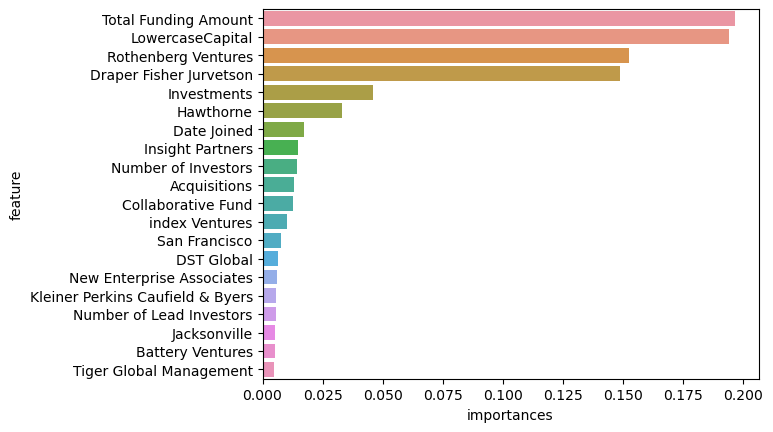

<Figure size 20000x30000 with 0 Axes>

In [100]:
sns.barplot(forest_importances["importances"][0:20],forest_importances["feature"][0:20])
plt.figure(figsize=[200,300])

In [133]:
import shap

In [134]:
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test,max_evals=600)

Permutation explainer: 214it [02:09,  1.55it/s]                                                                        


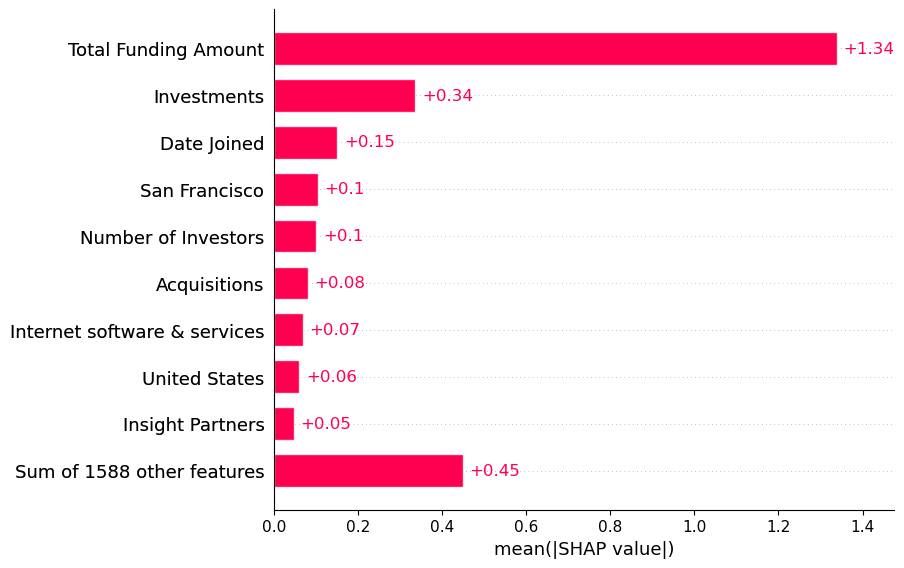

In [135]:
shap.plots.bar(shap_values)

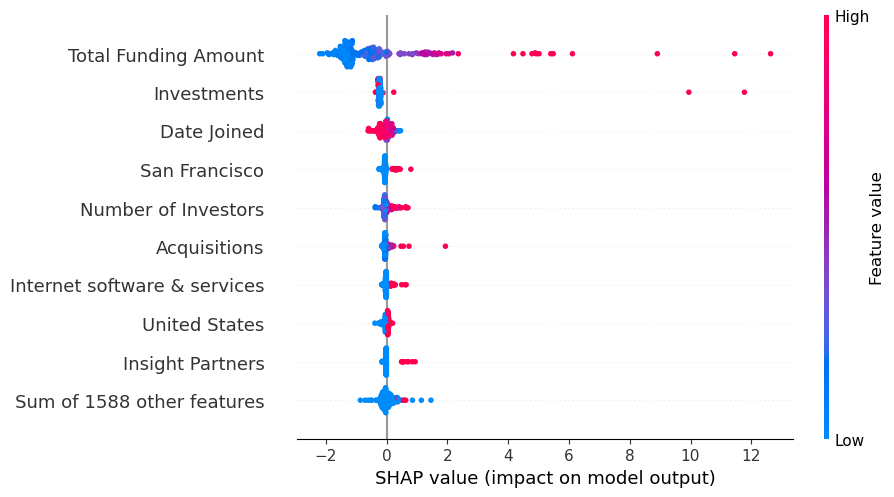

In [136]:
shap.plots.beeswarm(shap_values)

In [137]:
X_test.columns[0:100]

Index(['Acquisitions', 'Exits', 'Investments', 'Total Funding Amount',
       'Number of Lead Investors', 'Number of Investors', 'Date Joined',
       'education', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Republic',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France', 'Germany',
       'Hong Kong', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Liechtenstein', 'Lithuania', 'London', 'Luxembourg',
       'Malaysia', 'Mexico', 'Netherlands', 'Nigeria', 'Norway', 'Philippines',
       'Senegal', 'Seychelles', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vietnam', 'Artificial Intelligence',
       'Artificial intelligence', 'Auto & transportation', 'Consumer & retail',
       'Cybersecurity', 'Data management & analytics',
       'E-commerce & direct-to-consumer', '

In [147]:
np.where(X_test.columns == "Artificial intelligence")

(array([56], dtype=int64),)

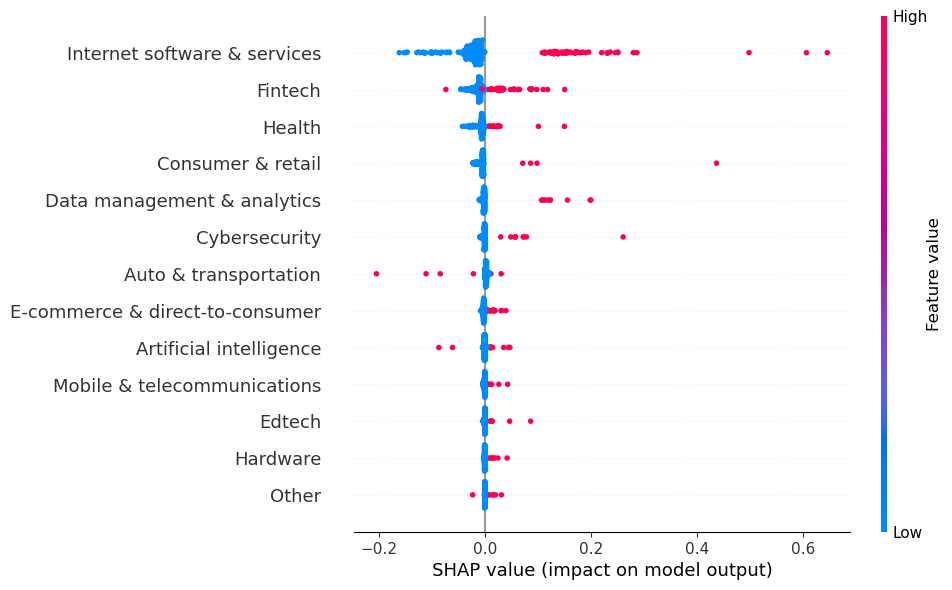

In [151]:
shap.plots.beeswarm(shap_values[:,56:69],max_display = 20)

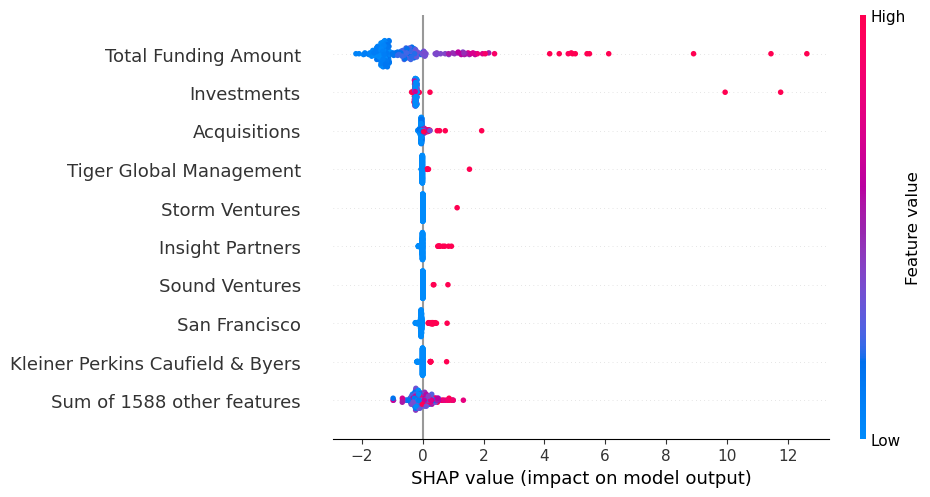

In [139]:
shap.plots.beeswarm(shap_values,order=shap_values.abs.max(0))

### Deep Learning Model

In [162]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Flatten,MaxPooling1D
from sklearn.metrics import r2_score

In [153]:
X_train.shape[1]

1597

In [176]:
model = Sequential()

model.add(Conv1D(filters=100, kernel_size=3, activation='relu', input_shape=(1597, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1595, 100)         400       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 797, 100)         0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 79700)             0         
                                                                 
 dense_25 (Dense)            (None, 50)                3985050   
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,985,501
Trainable params: 3,985,501
Non-trainable params: 0
___________________________________________

In [177]:
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train.to_numpy().reshape(-1, 1597, 1), y_train, epochs=20, batch_size=20)

# Predict using the model and calculate the r-squared value
y_pred = model.predict(X_test.to_numpy().reshape(-1, 1597, 1))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Epoch 1/20
43/43 [==============================] - 1s 25ms/step - loss: 129320886468608.0000
Epoch 2/20
43/43 [==============================] - 1s 25ms/step - loss: 51.7605
Epoch 3/20
43/43 [==============================] - 1s 25ms/step - loss: 51.7595
Epoch 4/20
43/43 [==============================] - 1s 26ms/step - loss: 51.7595
Epoch 5/20
43/43 [==============================] - 1s 26ms/step - loss: 51.7595
Epoch 6/20
43/43 [==============================] - 1s 26ms/step - loss: 51.7595
Epoch 7/20
43/43 [==============================] - 1s 25ms/step - loss: 51.7595
Epoch 8/20
43/43 [==============================] - 1s 25ms/step - loss: 51.7595
Epoch 9/20
43/43 [==============================] - 1s 26ms/step - loss: 51.7595
Epoch 10/20
43/43 [==============================] - 1s 27ms/step - loss: 51.7595
Epoch 11/20
43/43 [==============================] - 1s 26ms/step - loss: 51.7595
Epoch 12/20
43/43 [==============================] - 1s 25ms/step - loss: 51.7595
Epoch 13/20
